<a href="https://colab.research.google.com/github/vitorNicoletti/ProvaModelagem/blob/main/C%C3%B3pia_de_Substitutiva_RA1_Individual_Quinta_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação De Recuperação INDIVIDUAL RA1 - 2024-1 (substitutiva)

**Antes de começar, leia estas instruções cuidadosamente.**
Esta avaliação é individual. Você poderá consultar qualquer fonte disponível na biblioteca, suas anotações ou na internet. Mas, não poderá consultar outras pessoas.

Não existirão prorrogações de prazo de entrega.

**Trabalhos contendo partes idênticas entregues por pessoas, diferentes, serão zerados.**

Todos os trabalhos serão entregues em uma cópia deste caderno de atividades na forma de um link postado no AVA da instituição (Canvas). Todos os enunciados devem ser preservados e você deverá inserir uma célula de textos com o **seu nome**, logo após esta célula de texto de instruções.

Qualquer alteração do caderno contendo as suas respostas que seja registrada após a data de postagem provocará a anulação da avaliação.

Você poderá usar, neste notebook, apenas a linguagem python limitada ao uso das seguintes bibliotecas: numpy, sympy, matplotlib, ipWidgets e IPython. Todo e qualquer gráfico deverá ser criado usando o Python.

Entrega será realizada com a postagem de um link para um ambiente de execução, no AVA da institução. Neste link o seu caderno deve permitir ser executado (permissão de leitor). Serão aceitos links diretos ao ambiente do Google Colaboratory, ou Links a um caderno do Google Colaboratory que tenha sido salvo pelo próprio Google Colaboratory no GitHub. Links para outro ambiente, ou que requeiram qualquer tipo de download, cliques extras, ou ainda, que requeiram aprovação para acesso, provocarão o zeramento desta avaliação.

Todas as suas simplificações e considerações serão levadas em consideração. Contudo, lembre-se que estas questões devem ser resolvidas com álgebra formal e apenas álgebra.

Se você encontrar algo errado nesta avaliação simplesmente anote suas observações na própria questão. Suas observações serão consideradas durante a avaliação e, em caso de pertinência, poderão encejar a anulação do item, ou questão, a critério do professor.

Não é permitido usar qualquer técnica matemática baseada em derivação, cálculo numérico, séries de Taylor ou Leibntz, ou que fuja dos conteúdos apresenados em aula referentes ao estudo dos conteúdos referentes a esta avaliação.

Esta avaliação aborda os conteúdos referentes a limites, fórmula das diferenças finitas e tangentes.

**Lembrem-se a interpretação faz parte da questão.**


Vitor Nicoletti

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display, Math
from sympy import oo
x = sp.symbols('x')

def criarGraficoELimitesLaterais(funcao,ponto_limite):
  # Calcula o limite da função no ponto desejado
  limite = calculaLimite(funcao,ponto_limite)
  plotarGrafico(funcao,ponto_limite,limite)
  print("ANALISE LATERAL: ")
  tabela_latex = criarAnaliseLateral(funcao,ponto_limite)
  display(Math(tabela_latex))




def criar_pontos_aproximacao(ponto_limite, distancia=[0.1, 0.01, 0.001, 0.0001, 0.00001]):
  pontos_esquerda = [ponto_limite - d for d in distancia]
  pontos_direita = [ponto_limite + d for d in distancia]
  return pontos_esquerda, pontos_direita


def calculaLimite(funcao,ponto_limite):
  limite = sp.limit(funcao, x, ponto_limite)
  print(limite)
  return limite

def criaPontoStartFinal(ponto_limite):
  if ponto_limite >= 0:
    x_start = ponto_limite - (ponto_limite + 1)
    x_stop = ponto_limite + ponto_limite +1
  else:
    x_start = ponto_limite + ponto_limite - 1
    x_stop = ponto_limite - (ponto_limite -1)
  return x_start, x_stop

def criaXYvalues(funcao,ponto_limite):
  x_start, x_stop = criaPontoStartFinal(ponto_limite)
  x_vals = np.linspace(x_start, x_stop, 400)
  y_vals = [sp.lambdify(x, funcao)(x_val) for x_val in x_vals]
  return x_vals, y_vals

def plotarGrafico(funcao, ponto_limite, limite):
    # Plota a função
    x_vals, y_vals = criaXYvalues(funcao, ponto_limite)
    funcao_latex = sp.latex(funcao)  # Converte a expressão da função para formato LaTeX
    plt.plot(x_vals, y_vals, label=f'$f(x) = {funcao_latex}$')  # Adiciona a função como legenda formatada em LaTeX
    plt.scatter([ponto_limite], [limite], s=30, facecolors='white', edgecolors='black')
    plt.text(ponto_limite + 0.1, limite - 0.3, f'({ponto_limite}, {limite})', fontsize=10)
    # Ativa a grade
    plt.grid(True, which='both', axis='both', color='lightgray', linestyle='-', linewidth=0.5)
    # Ajusta os limites dos eixos para melhor visualização
    x_start, x_stop = criaPontoStartFinal(ponto_limite)
    plt.xlim(x_start, x_stop)
    plt.ylim(min(y_vals)-2, max(y_vals)+1)
    plt.legend()  # Adiciona a legenda

    plt.show()

def criarAnaliseLateral(funcao,ponto_limite):
  pontos_esquerda, pontos_direita = criar_pontos_aproximacao(ponto_limite)
  # Recalculando os valores de f(x) para os pontos à esquerda e à direita
  valores_esquerda = [funcao.subs(x, ponto).evalf() for ponto in pontos_esquerda]
  valores_direita = [funcao.subs(x, ponto).evalf() for ponto in pontos_direita]
  # Preparando a saída em formato de tabela novamente
  tabela_latex = "\\begin{array}{|c|c|c|c|}\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\text{Aprox. à Esquerda} & \\text{Valor} & \\text{Aprox. à Direita} & \\text{Valor} \\\\\n"
  tabela_latex += "\\hline\n"
  for i in range(len(pontos_esquerda)):
    tabela_latex += f"{pontos_esquerda[i]:.5f} & {valores_esquerda[i]:.5f} & {pontos_direita[i]:.5f} & {valores_direita[i]:.5f} \\\\\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\end{array}"
  return tabela_latex



## Questões
Usando apenas álgebra encontre o limites solicitados a seguir e faça uma análise dos resultados encontrados. Para fazer a análise você pode usar as ferramentas que desejar, desde que seja possível verificar a validade das suas afirmações usando apenas este caderno de avaliação.

Lembre-se você deve usar notação matemática na sua resposta. O que implica no uso de Latex nas células de texto deste caderno de avaliação.

Observe que o cálculo do valor de tendência do limite, usando uma calculadora, site, ou ferramenta qualquer, por si só não pode ser usado como argumento na sua análise. Isso quer dizer que justificativas como o limite é $w$ porque o Sympy disse que era esse valor, não serão aceitas.

### Exercício 1
$$ \lim_{x \to 0} \frac{\sqrt{x+9} - 3}{x} $$

Substituindo x por 0 temos:
$$\frac{0}{0}$$

Por conta da indeterminação, tentamos simplificar primeiro, por racionalização

$$ \lim_{x \to 0} \frac{\sqrt{x+9} - 3}{x} . \frac{\sqrt{x+9} + 3}{\sqrt{x+9} + 3}$$

$$ \lim_{x \to 0} \frac{3.\sqrt{x+9}-3.\sqrt{x+9}+x+9-9}{x.(\sqrt{x+9} + 3)} $$
$$ \lim_{x \to 0} \frac{1}{\sqrt{x+9} + 3} $$

Substituindo x por 0 agora temos:

$$ \lim_{x \to 0} \frac{1}{\sqrt{0+9} + 3} $$

$$ \lim_{x \to 0} \frac{1}{6} $$

Resposta:
$$\frac{1}{6}$$


1/6


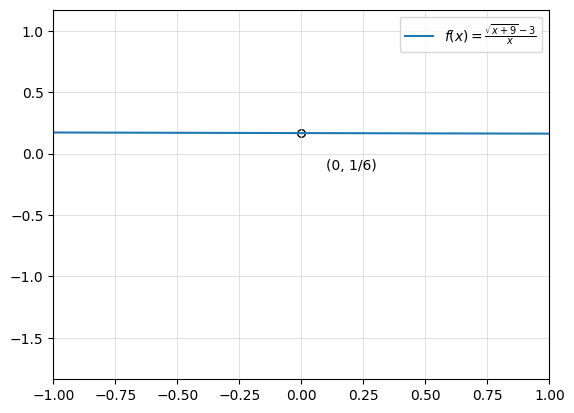

ANALISE LATERAL: 


<IPython.core.display.Math object>

In [10]:
import sympy
expr = (sympy.sqrt(x+9)-3)/x
ponto_limite = 0
criarGraficoELimitesLaterais(expr,ponto_limite)

 O resultado do limite condiz com as analises laterais e a analise do ponto no grafico.


### Exercício 2
$$ \lim_{x \to \infty} \frac{25x + 7}{\sqrt{5x^2 + 2}} $$

Substituindo por infinito positivo:

$$ \lim_{x \to \infty} \frac{\infty}{\sqrt{\infty}} $$

Como o resultado e uma indeterminacao, tentemos simplificar a expressao:
$$ \lim_{x \to \infty} \frac{25 + \frac{7}{x}}{\sqrt{5 + \frac{2}{x^2}}} $$


Partindo do princípio que:

$$lim_{x \to z} \frac{a}{b} = \frac{lim_{x \to z}a}{lim_{x \to z}b}$$

$$  \frac{\lim_{x \to \infty}(25 + \frac{7}{x})}{\lim_{x \to \infty}(\sqrt{5 + \frac{2}{x^2}})} $$
Substituindo por infinito positivo:
$$\lim_{x \to \infty}(25 + \frac{7}{\infty}) = 25$$

$$\lim_{x \to \infty}(\sqrt{5 + \frac{2}{x^2}})= \sqrt{5}$$

Portanto:

$$ \lim_{x \to \infty} \frac{25x + 7}{\sqrt{5x^2 + 2}} = \frac{25}{\sqrt{5}}$$

Simplificando:

$$= \frac{\sqrt{5}.\sqrt{5}.5}{\sqrt{5}}$$
$$= 5.\sqrt{5}$$

Resultado:
$$ 5.\sqrt{5}$$








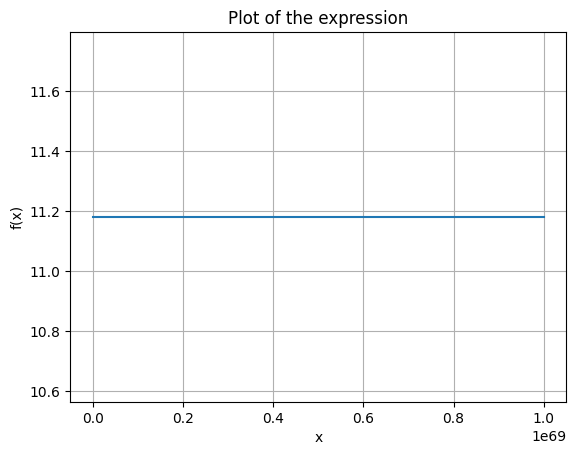

In [14]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.symbols('x')
expr = (25*x +7) /(sympy.sqrt(5*(x**2)+2))

x_values = np.linspace(10**39, 10**69, 1000)

y_values = [sp.N(expr.subs(x, val)) for val in x_values]

# Plot the graph
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the expression')
plt.grid(True)
plt.show()

In [12]:
import sympy
def criar_pontos_aproximacao(ponto_limite):
  distancia=[ponto_limite*2, ponto_limite*4, ponto_limite*6, ponto_limite*8, ponto_limite*10]

  pontos_direita = [ponto_limite + d for d in distancia]
  return pontos_direita

def criarAnaliseLateral(funcao,ponto_limite):
  pontos_direita = criar_pontos_aproximacao(ponto_limite)
  # Recalculando os valores de f(x) para os pontos à esquerda e à direita

  valores_direita = [funcao.subs(x, ponto).evalf() for ponto in pontos_direita]
  # Preparando a saída em formato de tabela novamente
  tabela_latex = "\\begin{array}{|c|c|}\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\text{Aprox. à Direita} & \\text{Valor} \\\\\n"
  tabela_latex += "\\hline\n"

  for i in range(len(pontos_direita)):
    tabela_latex += f"{pontos_direita[i]:.5f} & {valores_direita[i]:.5f} \\\\\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\end{array}"
  return tabela_latex


expr = (25*x +7) /(sympy.sqrt(5*(x**2)+2))

display(Math(criarAnaliseLateral(expr,9*10**50)))

<IPython.core.display.Math object>

considerando que a aproximacao de raiz de 5 e 2.24, o resultado da analise lateral e a analise do grafico condiz com o calculo do limite.


### Exercício 3
$$
\lim_{x \to 1} f(x) \text{ onde } f(x) = \begin{cases}
2x+1 & x \leq 1 \\
x^2 + 1 & x > 1
\end{cases}
$$


Como nesse exercício nós temos dois comportamentos diferentes na aproximação pela esquerda ou pela direita, não haverá apenas um limite, e sim dois diferentes dependendo da aproximação.

Pela esquerda:

$$\lim_{x \to 1} 2x + 1$$

Substituindo x por 1:

$$\lim_{x \to 1} 3$$

Limite aproximação pela esquerda:

$$3$$

Pela direita:

$$\lim_{x \to 1} x^2 + 1$$

Substituindo x por 1:

$$\lim_{x \to 1} 2$$

Limite aproximação pela direita:

$$2$$




3


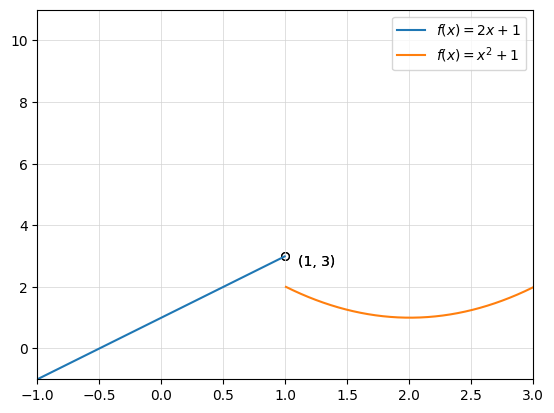

In [3]:
def plotarGraficosEsquerdaDireita(funcaoEsq,funcaoDir,ponto_limite,limite):
    # Plota a função
    x_vals, y_vals = criaXYvalues(funcaoEsq, ponto_limite)
    x_vals_Esq = x_vals[:200]
    y_vals_Esq = y_vals[:200]
    funcao_latex = sp.latex(funcaoEsq)  # Converte a expressão da função para formato LaTeX
    plt.plot(x_vals_Esq, y_vals_Esq, label=f'$f(x) = {funcao_latex}$')  # Adiciona a função como legenda formatada em LaTeX
    plt.scatter([ponto_limite], [limite], s=30, facecolors='white', edgecolors='black')
    plt.text(ponto_limite + 0.1, limite - 0.3, f'({ponto_limite}, {limite})', fontsize=10)

    x_vals, y_vals = criaXYvalues(funcaoDir, ponto_limite)
    x_vals_Dir = x_vals[200:];
    y_vals_Dir= y_vals[:200]
    funcao_latex = sp.latex(funcaoDir)  # Converte a expressão da função para formato LaTeX
    plt.plot(x_vals_Dir, y_vals_Dir, label=f'$f(x) = {funcao_latex}$')  # Adiciona a função como legenda formatada em LaTeX
    plt.scatter([ponto_limite], [limite], s=30, facecolors='white', edgecolors='black')
    plt.text(ponto_limite + 0.1, limite - 0.3, f'({ponto_limite}, {limite})', fontsize=10)
    # Ativa a grade
    plt.grid(True, which='both', axis='both', color='lightgray', linestyle='-', linewidth=0.5)
    # Ajusta os limites dos eixos para melhor visualização
    x_start, x_stop = criaPontoStartFinal(ponto_limite)
    plt.xlim(x_start, x_stop)
    plt.ylim(min(y_vals)-2, max(y_vals)+1)
    plt.legend()  # Adiciona a legenda

    plt.show()

plotarGraficosEsquerdaDireita(2*x+1,x**2+1,1,calculaLimite(2*x+1,1))




### Exercício 4
$$\lim_{x \to -\infty} (\sqrt{x^2 - x} - x)$$

**Atenção**: o sympy parece não calcular este limite corretamente.

#
$$\lim_{x \to -\infty} (\sqrt{x^2 - x} - x)$$

Substituindo x por infinito negativo:

$$\lim_{x \to -\infty} (\sqrt{-\infty^2 - -\infty} - -\infty)$$

$$\lim_{x \to -\infty} (\sqrt{\infty +\infty} +\infty)$$

Como não é possivel continuar o calculo, tentemos simplificar a expressao original:

$$\lim_{x \to -\infty} (\sqrt{x^2 - x} - x)$$

$$\lim_{x \to -\infty} (\sqrt{x (x-1)} - x)$$

$$\lim_{x \to -\infty} (\sqrt{x^2 .(1-\frac{1}{x})} - x)$$

$$\lim_{x \to -\infty} (\sqrt{x^2}. \sqrt{ (1-\frac{1}{x})} - x)$$

$$\lim_{x \to -\infty} (|x|. \sqrt{ (1-\frac{1}{x})} - x)$$

Como o valor de x se aproxima de -oo, |x| é equivalente a -x:

$$\lim_{x \to -\infty} (-x. \sqrt{ (1-\frac{1}{x})} - x)$$

Substituindo x por infinito negativo:

$$\lim_{x \to -\infty} (--\infty. \sqrt{ (1-\frac{1}{-\infty})} - -\infty)$$

$$\lim_{x \to -\infty} (\infty. \sqrt{1} +\infty)$$

$$\lim_{x \to -\infty} (\infty+\infty)$$

$$\lim_{x \to -\infty} (\infty)$$

Resposta:

$$(+\infty)$$





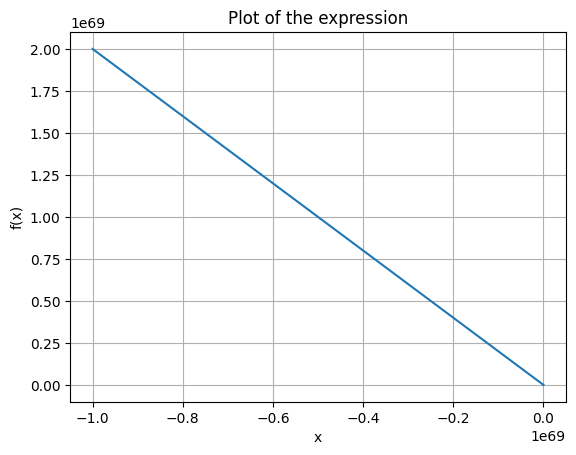

In [18]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.symbols('x')
expr = sympy.sqrt(x**2-x)-x

x_values = np.linspace(-(10**39), -(10**69), 1000)

y_values = [sp.N(expr.subs(x, val)) for val in x_values]

# Plot the graph
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the expression')
plt.grid(True)
plt.show()

In [4]:
import sympy
def criar_pontos_aproximacao(ponto_limite):
  distancia=[ponto_limite*2, ponto_limite*4, ponto_limite*6, ponto_limite*8, ponto_limite*10]

  pontos_direita = [ponto_limite + d for d in distancia]
  return pontos_direita

def criarAnaliseLateral(funcao,ponto_limite):
  pontos_direita = criar_pontos_aproximacao(ponto_limite)
  # Recalculando os valores de f(x) para os pontos à esquerda e à direita

  valores_direita = [funcao.subs(x, ponto).evalf() for ponto in pontos_direita]
  # Preparando a saída em formato de tabela novamente
  tabela_latex = "\\begin{array}{|c|c|}\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\text{Aprox. à Direita} & \\text{Valor} \\\\\n"
  tabela_latex += "\\hline\n"

  for i in range(len(pontos_direita)):
    tabela_latex += f"{pontos_direita[i]:.5f} & {valores_direita[i]:.5f} \\\\\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\end{array}"
  return tabela_latex


expr = sympy.sqrt(x**2-x)-x

display(Math(criarAnaliseLateral(expr,-9*10**50)))

<IPython.core.display.Math object>

Com a analise lateral e do grafico, vemos que quanto mais o valor se aproxima de infinito negativo, maior e o valor de y, confirmando o calculo do limite.


### Exercício 5
$$ \lim_{x \to \infty} \frac{4x^2 + 3x - 5}{2x^2 - x + 1} $$

Tentando Substituir x por infinito positivo temos:
$$\frac{\infty}{\infty-\infty}$$

Como a subtração de infinitos fica uma resposta indeterminada, não é possivel apenas substituir direto.

$$ \lim_{x \to \infty} \frac{4x^2 + 3x - 5}{2x^2 - x + 1} $$

$$ \lim_{x \to \infty} \frac{4+ \frac{3}{x} - \frac{5}{x^2}}{2 - \frac{1}{x} + \frac{1}{x^2}} $$

Partindo do princípio que:

$$lim_{x \to a} \frac{a}{b} = \frac{lim_{x \to z}a}{lim_{x \to z}b}$$

Portanto:

$$ \lim_{x \to \infty} \frac{4+ \frac{3}{x} - \frac{5}{x^2}}{2 - \frac{1}{x} + \frac{1}{x^2}} $$

$$ \lim_{x \to \infty} \frac{\lim_{x \to \infty}(4+ \frac{3}{x} - \frac{5}{x^2})}{\lim_{x \to \infty}(2 - \frac{1}{x} + \frac{1}{x^2})} $$

$$ \lim_{x \to \infty} \frac{4}{2} $$

$$ \lim_{x \to \infty} 2 $$

Resposta:
$$2$$



In [5]:
import sympy
def criar_pontos_aproximacao(ponto_limite):
  distancia=[ponto_limite*2, ponto_limite*4, ponto_limite*6, ponto_limite*8, ponto_limite*10]

  pontos_direita = [ponto_limite + d for d in distancia]
  return pontos_direita

def criarAnaliseLateral(funcao,ponto_limite):
  pontos_direita = criar_pontos_aproximacao(ponto_limite)
  # Recalculando os valores de f(x) para os pontos à esquerda e à direita

  valores_direita = [funcao.subs(x, ponto).evalf() for ponto in pontos_direita]
  # Preparando a saída em formato de tabela novamente
  tabela_latex = "\\begin{array}{|c|c|}\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\text{Aprox. à Direita} & \\text{Valor} \\\\\n"
  tabela_latex += "\\hline\n"

  for i in range(len(pontos_direita)):
    tabela_latex += f"{pontos_direita[i]:.5f} & {valores_direita[i]:.5f} \\\\\n"
  tabela_latex += "\\hline\n"
  tabela_latex += "\\end{array}"
  return tabela_latex


expr = (4*x**2 +3*x-5)/(2*x**2-x+1)

display(Math(criarAnaliseLateral(expr,9*10**50)))

<IPython.core.display.Math object>

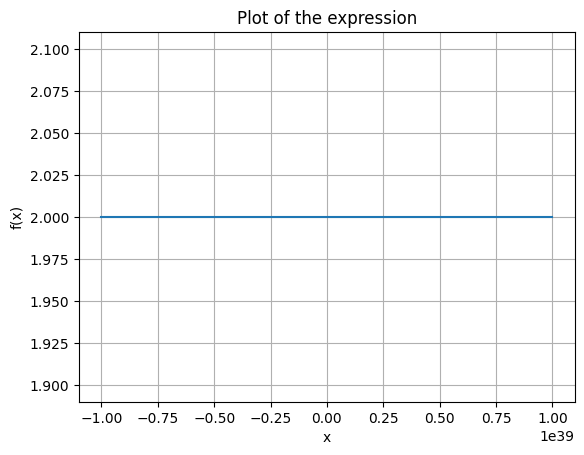

In [6]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.symbols('x')
expr = (4*x**2 + 3*x - 5) / (2*x**2 - x + 1)

x_values = np.linspace(-10**39, 10**39, 1000)

y_values = [sp.N(expr.subs(x, val)) for val in x_values]

# Plot the graph
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the expression')
plt.grid(True)
plt.show()

A partir da analise do grafico e do limite, vemos que o valor, quando se aproxima do infinito positivo, o y aproxima-se de 2, confirmando o calculo do limite.


**Rúbrica de avaliação**: cada limite corretamente determinado com a algebra demonstrada em notação matemática 1 ponto; cada análise consistente 1 ponto. Total 2 pontos por questão implicando em, no máximo 10 pontos.

As análises podem ser feitas por meio da análise gráfica, ou da ánálise dos limites laterais (aproximações pela esquerda e pela direita. Serão avaliadas de acordo com o que for apresentado por cada aluno.
